In [78]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import *


X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)



# 计算欧几里得距离
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) # 求两个向量之间的距离


# 构建聚簇中心，取k个(此例中为4)随机质心
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))   # 每个质心有n个坐标值，总共要k个质心
    for j in range(n):
        minJ = min(dataSet[:,j])
        maxJ = max(dataSet[:,j])
        rangeJ = float(maxJ - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k, 1)
    return centroids


# k-means 聚类算法
def kMeans(dataSet, k, distMeans =distEclud, createCent = randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))    # 用于存放该样本属于哪类及质心距离
    # clusterAssment第一列存放该数据所属的中心点，第二列是该数据到中心点的距离
    centroids = createCent(dataSet, k)
    clusterChanged = True   # 用来判断聚类是否已经收敛
    while clusterChanged:
        clusterChanged = False;
        for i in range(m):  # 把每一个数据点划分到离它最近的中心点
            minDist = inf; minIndex = -1;
            for j in range(k):
                distJI = distMeans(centroids[j,:], dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j  # 如果第i个数据点到第j个中心点更近，则将i归属为j
            if clusterAssment[i,0] != minIndex: clusterChanged = True;  # 如果分配发生变化，则需要继续迭代
            clusterAssment[i,:] = minIndex,minDist**2   # 并将第i个数据点的分配情况存入字典
        print(centroids)
        for cent in range(k):   # 重新计算中心点
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]   # 去第一列等于cent的所有列
            centroids[cent,:] = mean(ptsInClust, axis = 0)  # 算出这些数据的中心点
    return centroids, clusterAssment


# 用测试数据及测试kmeans算法
datMat = mat(X)
myCentroids,clustAssing = kMeans(datMat,3)
# myCentroids中心点坐标,clustAssing是分类结果
print('中心点坐标是：')
print(myCentroids)

[[ 0.5562008   0.37359269]
 [-0.20682798  2.71527851]
 [-0.53383307  0.9584782 ]]
[[ 2.06521743  0.96137409]
 [-0.30205961  3.69416993]
 [-1.26281769  1.831452  ]]
[[ 2.06521743  0.96137409]
 [ 0.38952154  4.13226434]
 [-1.6687753   2.72090449]]
[[ 2.06521743  0.96137409]
 [ 0.9329651   4.35420712]
 [-1.5947298   2.92236966]]
中心点坐标是：
[[ 2.06521743  0.96137409]
 [ 0.9329651   4.35420712]
 [-1.5947298   2.92236966]]


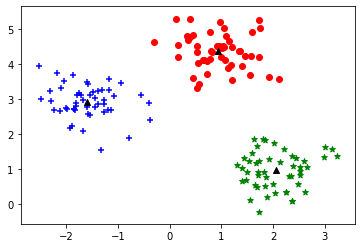

In [79]:
# 绘制数据分布图
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0],X[i][1], c = "red", marker='o')
    elif y[i] == 1:
        plt.scatter(X[i][0],X[i][1], c = "green", marker='*')
    elif y[i] == 2:
            plt.scatter(X[i][0],X[i][1], c = "blue", marker='+')


plt.scatter(myCentroids[0,0],myCentroids[0,1], c = "black", marker='^')
plt.scatter(myCentroids[1,0],myCentroids[1,1], c = "black", marker='^')
plt.scatter(myCentroids[2,0],myCentroids[2,1], c = "black", marker='^')
plt.show()